In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os

In [141]:
from scipy.stats import norm, t, uniform

In [10]:
n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error


In [170]:
def resample(n=100, ref_density=norm(), target_density=t(df=3)):
    samples = ref_density.rvs(n) 
    weights =  target_density.pdf(samples)/ref_density.pdf(samples) 
    sum_weights = np.sum(weights)
    norm_weights = weights/sum_weights
    resamples = np.random.choice(a=samples, p=norm_weights, replace=True, size=n)
    return resamples

def estimate_moments(resamples):
    return {'mean': np.mean(resamples), 'var': np.var(resamples, ddof=1)}
   
def plot_hist(resamples, target_density=t(df=3)):
    n = len(resamples)
    plt.hist(resamples, edgecolor='black', bins=20, density=True, label='samples')
    x = np.linspace(-8, 8, 1000)
    plt.plot(x, target_density.pdf(x=x), label='target density')
    plt.title(f'n = {n}')
    plt.legend()
    plt.savefig(f'../figures/resamples_n_{n}')
  

<Figure size 640x480 with 0 Axes>

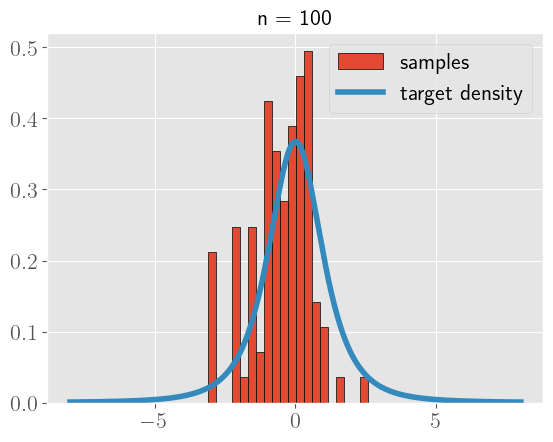

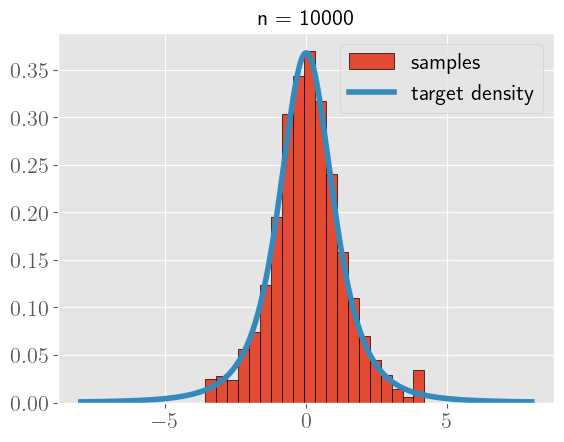

<Figure size 640x480 with 0 Axes>

In [172]:
resamples = resample(n=100)
plot_hist(resamples)
plt.figure()
resamples = resample(n=10000)
plot_hist(resamples)
plt.figure()

In [178]:
resamples = resample(n=100)
print(estimate_moments(resamples))
resamples = resample(n=100000)
print(estimate_moments(resamples))

{'mean': 0.1545130741401315, 'var': 1.9071907263323775}
{'mean': -0.06427483780793512, 'var': 2.0077337769862122}
